In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import expit

import measures
from model import LogReg
from preprocessing import Preprocessor

In [5]:
prep = Preprocessor()

# 1. Bank data

Missing values: Categorical with 'unknown'. Will be treated as a separate class

In [6]:
bank_df = pd.read_csv('data/bank-additional-full.csv', sep=';')
bank_target = (bank_df['y'] == 'yes').astype(int)
bank_df = bank_df.drop('y', axis=1)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#### Train test division

In [7]:
bank_prep = Preprocessor()
bank_df_train, bank_df_test, bank_y_train, bank_y_test = bank_prep.train_test_split(bank_df, bank_target)
print(bank_df_train.shape, bank_df_test.shape)

(30891, 20) (10297, 20)


#### One Hot Encoding

In [8]:
bank_df_train_ohe = bank_prep.one_hot_encoding_fit_transform(bank_df_train)

In [9]:
bank_df_train_ohe

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_apr,month_aug,month_sep,month_may,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
27767,34,301,3,999,0,-1.8,92.843,-50.0,1.726,5099.1,...,0,0,0,0,1,0,0,0,1,0
24985,54,1855,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,0,0,0,0,1,0,1,0
20529,32,1092,4,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,1,0,0,0,0,1,0,1,0
1442,51,1178,2,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,1,0,0,0,0,1,0
38949,44,1628,2,6,1,-3.4,92.649,-30.1,0.719,5017.5,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,47,27,11,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,1,0,0,1,0,0,0,1,0
6065,45,643,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,1,0,1,0
12207,30,71,1,999,0,1.4,93.918,-42.7,4.956,5228.1,...,0,0,0,0,0,0,0,1,1,0
15811,22,228,3,999,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,0,0,1,0,0,1,0


In [10]:
bank_df_test_ohe = bank_prep.one_hot_encoding_transform(bank_df_test)

#### Removing almost collinear columns

In [11]:
bank_df_train_ohe_rc = bank_prep.remove_multicollinearity_fit_transform(bank_df_train_ohe)

/home/pawel/.local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping housing_yes with vif=inf
Dropping nr.employed with vif=82516.52961837639
Dropping cons.price.idx with vif=1719.882735340235
Dropping pdays with vif=266.41573196068794
Dropping marital_married with vif=214.81503148828068
Dropping euribor3m with vif=111.94847058330095
Dropping cons.conf.idx with vif=100.72717255892398
Dropping loan_no with vif=31.05172201240312
Dropping poutcome_nonexistent with vif=28.560973378926086
Dropping age with vif=21.39855153248021
Dropping job_admin. with vif=10.31676086192472
42 numerical features left in dataset  0  categorical


In [12]:
bank_df_test_ohe_rc = bank_prep.remove_multicollinearity_transform(bank_df_test_ohe)

In [13]:
bank_df_test_ohe_rc.shape

(10297, 42)

## Bank data models

In [14]:
lr=0.01
n_epochs=200
lr_models = {
    'GD': LogReg(optimization='Gradient Descent', learning_rate=lr, epochs=n_epochs, batch_size=32),
    'SGD': LogReg(optimization='Stochastic Gradient Descent', learning_rate=lr, epochs=n_epochs),
    'IRLS': LogReg(optimization='Iterative Reweighted Least Squares', epochs=n_epochs),
    'ADAM': LogReg(optimization='Adaptive Moment Estimation', epochs=n_epochs, learning_rate=0.01, beta_1=0.9,
                   beta_2=0.99, epsilon=1e-8)
}

In [147]:
def test_model_approaches(df_train_rc, df_train_no_rc, df_test_rc, df_test_no_rc, y_train, y_test):
    for after_rc in [True, False]:
        if after_rc:
            d_train = df_train_rc.copy()
            d_test = df_test_rc.copy()
        else:
            d_train = df_train_no_rc.copy()
            d_test = df_test_no_rc.copy()
        for balance_target in [True, False]:
            if balance_target:
                pos_classes_n = (y_train==1).sum()
                neg_classes_n = (y_train==0).sum()
                c_n = min(pos_classes_n, neg_classes_n)
                pos_c = np.random.choice((y_train==1).index, size=c_n, replace=False)
                neg_c = np.random.choice((y_train==0).index, size=c_n, replace=False)
                d_train_bt = d_train.loc[np.concatenate((pos_c, neg_c)), :].sample(frac=1).copy()
                train_target = y_train.loc[np.concatenate((pos_c, neg_c))].copy()
            else:
                d_train_bt = d_train.copy()
                train_target = y_train.copy()
            for after_scaling in [True, False]:
                if after_scaling:
                    s = StandardScaler()
                    d_train_model = s.fit_transform(d_train_bt)
                    d_test_model = s.transform(d_test)
                else:
                    d_train_model = d_train_bt.copy()
                    d_test_model = d_test.copy()
                if isinstance(d_train_model, pd.DataFrame):
                    d_train_model = d_train_model.to_numpy()
                if isinstance(d_test_model, pd.DataFrame):
                    d_test_model = d_test_model.to_numpy()
                print()
                print(f'After collinearity cleaning? {after_rc}. After scaling? {after_scaling}. After target balancing? {balance_target}')
                for model_name, lr in lr_models.items():
                    print(model_name)
                    try:
                        lr.train(d_train_model, train_target.to_numpy())
                        print('Any non-zero predictions on train data?', (lr.predict(d_train_model)==1).any())
                        print('Test accuracy:', round(measures.accuracy(lr.predict(d_test_model), y_test), 2))
                    except Exception as e:
                        print(e)



In [151]:
bank_y_test.mean()

0.11265417111780131

In [150]:
test_model_approaches(bank_df_train_ohe_rc, bank_df_train_ohe, bank_df_test_ohe_rc, bank_df_test_ohe,
                      bank_y_train, bank_y_test)


After collinearity cleaning? True. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Any non-zero predictions on train data? False
Test accuracy: 0.89
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.89

After collinearity cleaning? True. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.79
IRLS



Any non-zero predictions on train data? False
Test accuracy: 0.89
ADAM



Any non-zero predictions on train data? False
Test accuracy: 0.89

After collinearity cleaning? True. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.89
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.9
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.86

After collinearity cleaning? True. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.9
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.89

After collinearity cleaning? False. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.88

After collinearity cleaning? False. After scaling? False. After target balancing? True
GD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? False
Test accuracy: 0.89

After collinearity cleaning? False. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.86

After collinearity cleaning? False. After scaling? False. After target balancing? False
GD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.89
SGD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.89
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.9


In [67]:
sklearn_models = {
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'LR': LogisticRegression(max_iter=1000),
    'kNN': KNeighborsClassifier()
}

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
max([variance_inflation_factor(bank_df_train_ohe_rc.values, bank_df_train_ohe_rc.columns.get_loc(var)) for var in bank_df_train_ohe_rc.columns])

4.999514188862935

In [68]:
for m_name, m in sklearn_models.items():
    m.fit(bank_df_train_ohe_rc.to_numpy(), bank_y_train.to_numpy())
    print(m_name)
    print('Any non-zero predictions on train data?', (m.predict(bank_df_train_ohe_rc.to_numpy())==1).any())
    print('Test acc', (measures.accuracy(m.predict(bank_df_test_ohe_rc.to_numpy()), bank_y_test)))
    print('Test F1-score', (measures.f_measure(m.predict(bank_df_test_ohe_rc.to_numpy()), bank_y_test)))

LDA
Any non-zero predictions on train data? True
Test acc 0.9023016412547344
Test F1-score 0.5044334975369459
QDA
Any non-zero predictions on train data? True
Test acc 0.13003787510925513
Test F1-score 0.20556935083362893


/home/pawel/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LR
Any non-zero predictions on train data? True
Test acc 0.906671846168787
Test F1-score 0.48471849865951744
kNN
Any non-zero predictions on train data? True
Test acc 0.8944352724094397
Test F1-score 0.430591932949188


# 2. Diabetic Retinopathy
No missing values

In [50]:
from scipy.io import arff
import pandas as pd
data = arff.loadarff('data/messidor_features.arff')
retinopathy_df = pd.DataFrame(data[0])
retinopathy_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [51]:
retinopathy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1151 non-null   float64
 1   1       1151 non-null   float64
 2   2       1151 non-null   float64
 3   3       1151 non-null   float64
 4   4       1151 non-null   float64
 5   5       1151 non-null   float64
 6   6       1151 non-null   float64
 7   7       1151 non-null   float64
 8   8       1151 non-null   float64
 9   9       1151 non-null   float64
 10  10      1151 non-null   float64
 11  11      1151 non-null   float64
 12  12      1151 non-null   float64
 13  13      1151 non-null   float64
 14  14      1151 non-null   float64
 15  15      1151 non-null   float64
 16  16      1151 non-null   float64
 17  17      1151 non-null   float64
 18  18      1151 non-null   float64
 19  Class   1151 non-null   object 
dtypes: float64(19), object(1)
memory usage: 180.0+ KB


In [52]:
for c in retinopathy_df.columns:
    print("column name: ",c,"number of unique values: ",len(retinopathy_df[c].unique()),"Number of nulls",retinopathy_df.isna().sum().sum())

column name:  0 number of unique values:  2 Number of nulls 0
column name:  1 number of unique values:  2 Number of nulls 0
column name:  2 number of unique values:  110 Number of nulls 0
column name:  3 number of unique values:  104 Number of nulls 0
column name:  4 number of unique values:  99 Number of nulls 0
column name:  5 number of unique values:  91 Number of nulls 0
column name:  6 number of unique values:  84 Number of nulls 0
column name:  7 number of unique values:  69 Number of nulls 0
column name:  8 number of unique values:  1141 Number of nulls 0
column name:  9 number of unique values:  1141 Number of nulls 0
column name:  10 number of unique values:  1130 Number of nulls 0
column name:  11 number of unique values:  1032 Number of nulls 0
column name:  12 number of unique values:  795 Number of nulls 0
column name:  13 number of unique values:  579 Number of nulls 0
column name:  14 number of unique values:  415 Number of nulls 0
column name:  15 number of unique value

description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set#)

Target: `Class`

In [53]:
X_retinopathy=retinopathy_df.drop(columns='Class')
y_retinopathy=(retinopathy_df['Class'] == b'1').astype(int)

There are no categorical variables.

#### Train test split

In [54]:
ret_prep = Preprocessor()
ret_df_train, ret_df_test, ret_y_train, ret_y_test = ret_prep.train_test_split(X_retinopathy, y_retinopathy)

#### Collinearity detection

Pair correlations insight:

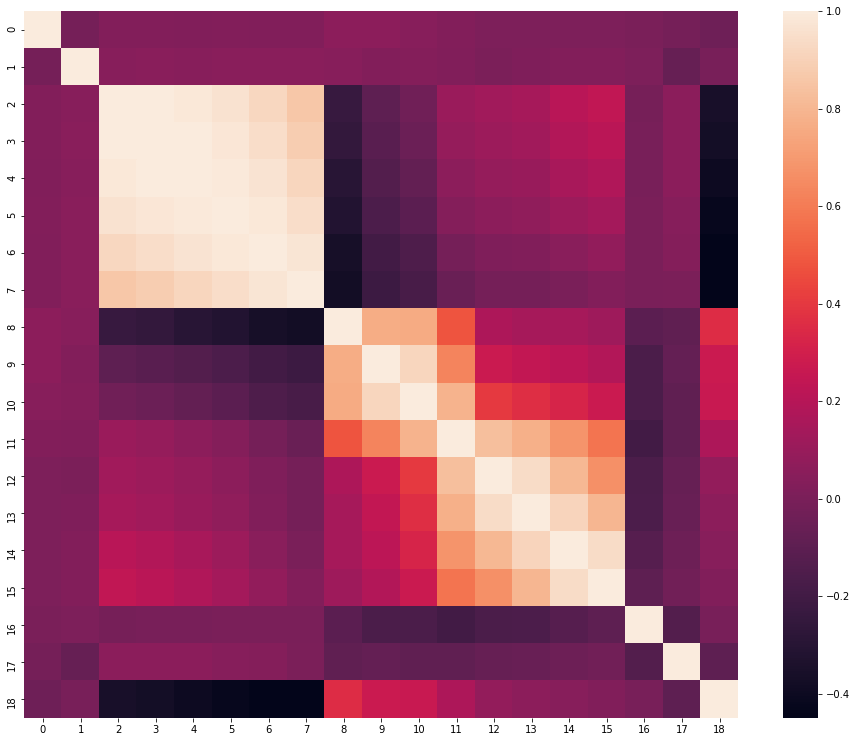

In [55]:
ret_prep.plot_corr(ret_df_train)

In [56]:
ret_df_train_rc = ret_prep.remove_multicollinearity_fit_transform(ret_df_train)

Dropping 3 with vif=1820.4142825045192
Dropping 4 with vif=1035.668246196822
Dropping 5 with vif=522.3518531731354
Dropping 0 with vif=182.205311611162
Dropping 6 with vif=163.605588635566
Dropping 16 with vif=47.57288659966959
Dropping 10 with vif=29.199350839919433
Dropping 14 with vif=26.250010960001045
Dropping 13 with vif=17.801435143581465
Dropping 2 with vif=16.146315190432645
Dropping 17 with vif=11.76611200457926
8 numerical features left in dataset  0  categorical


In [57]:
ret_df_test_rc = ret_prep.remove_multicollinearity_transform(ret_df_test)

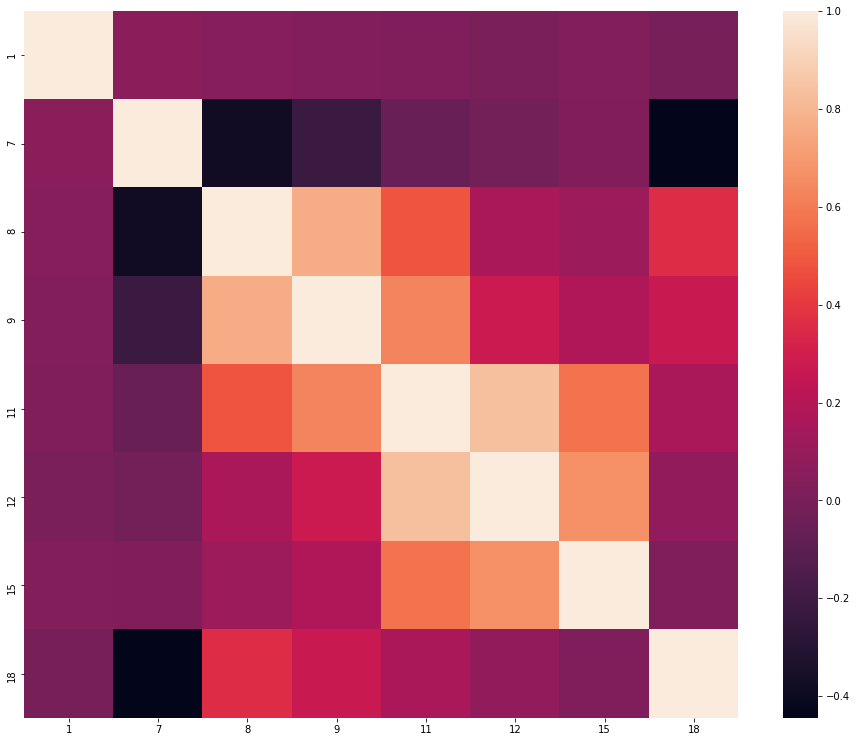

In [58]:
ret_prep.plot_corr(ret_df_train_rc)

#### Results without VIF reduction

In [59]:
model = LogisticRegression(max_iter=1e20)
model.fit(ret_df_train, ret_y_train)
print(ret_df_train.shape)
print('Train acc', model.score(ret_df_train, ret_y_train))
print('Test acc', model.score(ret_df_test, ret_y_test))

(863, 19)
Train acc 0.7601390498261877
Test acc 0.75


#### Results with VIF reduction

In [60]:
model = LogisticRegression(max_iter=1e20)
model.fit(ret_df_train_rc, ret_y_train)
print(ret_df_train_rc.shape)
print('Train acc', model.score(ret_df_train_rc, ret_y_train))
print('Test acc', model.score(ret_df_test_rc, ret_y_test))

(863, 8)
Train acc 0.6234067207415991
Test acc 0.6458333333333334


#### Results with VIF reduction and StandardScaler

In [61]:
st_sc = StandardScaler()
ret_df_train_rc_scaled = st_sc.fit_transform(ret_df_train_rc)

model = LogisticRegression(max_iter=1e20)
model.fit(ret_df_train_rc_scaled, ret_y_train)
print(ret_df_train_rc_scaled.shape)
print('Train acc', model.score(ret_df_train_rc_scaled, ret_y_train))
print('Test acc', model.score(st_sc.transform(ret_df_test_rc), ret_y_test))


(863, 8)
Train acc 0.6349942062572422
Test acc 0.6458333333333334


#### Results with feature selection based on correlation matrix

In [62]:
ret_df_train_dc=ret_prep.DeleteCorrelated(ret_df_train)
ret_df_test_dc = ret_df_test.loc[:, ret_df_train_dc.columns]
model = LogisticRegression(max_iter=1e20)
model.fit(ret_df_train_dc, ret_y_train)
print(ret_df_train_dc.shape)
print('Train acc', model.score(ret_df_train_dc, ret_y_train))
print('Test acc', model.score(ret_df_test_dc, ret_y_test))

(863, 7)
Train acc 0.6326767091541136
Test acc 0.6319444444444444


## Retinopathy modelling

In [64]:
test_model_approaches(ret_df_train_rc, ret_df_train, ret_df_test_rc, ret_df_test, ret_y_train, ret_y_test)


After collinearity cleaning? True. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.51
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.6
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.51
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.51

After collinearity cleaning? True. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.53
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.53
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.51
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.51

After collinearity cleaning? True. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.52
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.47
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.65
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.64

After collinearity cleaning? True. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.47
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.47
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.65
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.61

After collinearity cleaning? False. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.54
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.56
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.52
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.5

After collinearity cleaning? False. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.57
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.47
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.52
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.44

After collinearity cleaning? False. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.45
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.47
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.7
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.66

After collinearity cleaning? False. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.47
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.47
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.7
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.67


In [69]:
for m_name, m in sklearn_models.items():
    m.fit(ret_df_train_rc.to_numpy(), ret_y_train.to_numpy())
    print(m_name)
    print('Test acc', (measures.accuracy(m.predict(ret_df_test_rc.to_numpy()), ret_y_test)))
    print('Test F1-score', (measures.f_measure(m.predict(ret_df_test_rc.to_numpy()), ret_y_test)))

LDA
Test acc 0.6493055555555556
Test F1-score 0.6666666666666667
QDA
Test acc 0.5625
Test F1-score 0.4
LR
Test acc 0.6458333333333334
Test F1-score 0.6554054054054054
kNN
Test acc 0.5590277777777778
Test F1-score 0.5752508361204014


# 3. Breast Cancer Wisconsin

No missing values. Special treatment: columns `id` and `Unnamed: 32`

In [70]:
wdbc_df=pd.read_csv('data/wdbc.csv')

wdbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [71]:
wdbc_df['Unnamed: 32'].any()

False

In [72]:
y_wdbc=wdbc_df['diagnosis']=="M"
X_wdbc=wdbc_df.drop(columns=["id","diagnosis","Unnamed: 32"])

X_wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

As we can see all features are non-null numeric type variables. Which means that in this case one-hot-encoding won't be needed. The only things left to do is to remove collinear and multicollinear ones (maybe remove some outliers? from data) and split data into training and testing sets.

Correlation matrix showing that we should probably remove a fair number of variables

In [73]:
prep_wdbc = Preprocessor()

In [74]:
wdbc_train, wdbc_test, y_wdbc_train, y_wdbc_test = prep_wdbc.train_test_split(X_wdbc, y_wdbc)

Removal of variables based only on correlation

In [75]:
X_wdbc_cleaned_corr = prep_wdbc.DeleteCorrelated(wdbc_train,0.8)
X_wdbc_cleaned_corr.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'symmetry_worst'],
      dtype='object')

Removal of variables using Variance Inflation Factor (VIF)

In [76]:
X_wdbc_cleaned_train = prep_wdbc.remove_multicollinearity_fit_transform(wdbc_train)
X_wdbc_cleaned_train.tail()

Dropping radius_mean with vif=74555.20989645366
Dropping radius_worst with vif=8244.025275576187
Dropping perimeter_mean with vif=4028.9209258077544
Dropping perimeter_worst with vif=676.29164619743
Dropping fractal_dimension_mean with vif=567.1894117256846
Dropping smoothness_worst with vif=385.8360454611827
Dropping texture_worst with vif=342.2920455993646
Dropping fractal_dimension_worst with vif=205.7118428714327
Dropping symmetry_worst with vif=167.15056911649017
Dropping concavity_mean with vif=153.86622087758778
Dropping radius_se with vif=126.22043082379045
Dropping concave points_worst with vif=106.69695974494662
Dropping compactness_mean with vif=99.45183857146893
Dropping symmetry_mean with vif=90.104345624357
Dropping area_mean with vif=68.68597670546382
Dropping perimeter_se with vif=50.447729694479854
Dropping compactness_worst with vif=49.9699704227308
Dropping smoothness_mean with vif=35.195884933078894
Dropping texture_mean with vif=23.56921049774407
Dropping concave p

,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,concavity_worst
268,1.2190,18.24,0.005518,0.025890,0.02593,0.002157,0.19920
469,1.7400,27.85,0.014590,0.049610,0.01807,0.005217,0.31860
419,1.6780,18.99,0.006908,0.006972,0.02694,0.002060,0.03582
532,0.4801,17.25,0.003828,0.007078,0.01054,0.001697,0.12060
320,1.4710,22.68,0.010490,0.040040,0.02719,0.007596,0.18980


In [77]:
X_wdbc_cleaned_test = prep_wdbc.remove_multicollinearity_transform(wdbc_test)

In [79]:
y_wdbc_test.mean()

0.3706293706293706

In [78]:
test_model_approaches(X_wdbc_cleaned_train, wdbc_train, X_wdbc_cleaned_test, wdbc_test, y_wdbc_train, y_wdbc_test)


After collinearity cleaning? True. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.59
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.53
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.48

After collinearity cleaning? True. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.63
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.53
ADAM



Any non-zero predictions on train data? False
Test accuracy: 0.63

After collinearity cleaning? True. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.63
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.91
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.85

After collinearity cleaning? True. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.63
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.91
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.87

After collinearity cleaning? False. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.64
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.52
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.46

After collinearity cleaning? False. After scaling? False. After target balancing? True
GD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.63
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.52
ADAM



Any non-zero predictions on train data? False
Test accuracy: 0.63

After collinearity cleaning? False. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.64
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.61
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.97
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.95

After collinearity cleaning? False. After scaling? False. After target balancing? False
GD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.63
SGD


Early stopping

Any non-zero predictions on train data? False
Test accuracy: 0.63
IRLS



Any non-zero predictions on train data? True
Test accuracy: 0.97
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.92


In [80]:
for m_name, m in sklearn_models.items():
    m.fit(X_wdbc_cleaned_train.to_numpy(), y_wdbc_train.to_numpy())
    print(m_name)
    print('Test acc', (measures.accuracy(m.predict(X_wdbc_cleaned_test.to_numpy()), y_wdbc_test)))
    print('Test F1-score', (measures.f_measure(m.predict(X_wdbc_cleaned_test.to_numpy()), y_wdbc_test)))

LDA
Test acc 0.9020979020979021
Test F1-score 0.8541666666666667
QDA
Test acc 0.958041958041958
Test F1-score 0.9423076923076923
LR
Test acc 0.9300699300699301
Test F1-score 0.9019607843137256
kNN
Test acc 0.916083916083916
Test F1-score 0.8867924528301887


## 4. Etherneum frauds

Special treatment columns `Unnamed: 0`, `Index` and `Address`.

In [81]:
eth_prep = Preprocessor()
etherneum_df=pd.read_csv('data/transaction_dataset.csv')

#etherneum_df.head(2).T

In [82]:
to_drop=['Unnamed: 0','Index','Address']
etherneum_df.drop(columns=to_drop,inplace=True)

### Train test split

In [83]:
y_eth=etherneum_df['FLAG']
X_eth=etherneum_df.drop(columns='FLAG')

X_eth_train, X_eth_test, y_eth_train, y_eth_test = eth_prep.train_test_split(X_eth, y_eth)

Columns with null values

In [84]:
for col in X_eth_train.columns:
    if (X_eth_train[col].isna().values.sum()):
        print(col)

 Total ERC20 tnxs
 ERC20 total Ether received
 ERC20 total ether sent
 ERC20 total Ether sent contract
 ERC20 uniq sent addr
 ERC20 uniq rec addr
 ERC20 uniq sent addr.1
 ERC20 uniq rec contract addr
 ERC20 avg time between sent tnx
 ERC20 avg time between rec tnx
 ERC20 avg time between rec 2 tnx
 ERC20 avg time between contract tnx
 ERC20 min val rec
 ERC20 max val rec
 ERC20 avg val rec
 ERC20 min val sent
 ERC20 max val sent
 ERC20 avg val sent
 ERC20 min val sent contract
 ERC20 max val sent contract
 ERC20 avg val sent contract
 ERC20 uniq sent token name
 ERC20 uniq rec token name
 ERC20 most sent token type
 ERC20_most_rec_token_type


Columns which have less than 10 unique values

In [85]:
for col in X_eth_train.columns:
    if(len(X_eth_train[col].unique())<10):
        print(col,X_eth_train[col].unique())

min value sent to contract [0.   0.01 0.02]
max val sent to contract [0.       0.01     0.046029 0.02    ]
avg value sent to contract [0.       0.01     0.023014 0.02    ]
total ether sent contracts [0.         0.01       0.04602871 0.02      ]
 ERC20 uniq sent addr.1 [ 0. nan  1.  2.  3.]
 ERC20 avg time between sent tnx [ 0. nan]
 ERC20 avg time between rec tnx [ 0. nan]
 ERC20 avg time between rec 2 tnx [ 0. nan]
 ERC20 avg time between contract tnx [ 0. nan]
 ERC20 min val sent contract [ 0. nan]
 ERC20 max val sent contract [ 0. nan]
 ERC20 avg val sent contract [ 0. nan]


#### Categorical columns to be One Hot Encoded later

In [86]:
for c in X_eth_train.columns:
    if X_eth_train[c].dtype=='O':
        print(c,len(X_eth_train[c].unique()))

 ERC20 most sent token type 257
 ERC20_most_rec_token_type 404


#### Dealing with missing data
In all columns except for the ones with only 0's and NaN's we'll replace the missing values with the most frequent values in column. In the remaining ones we'll test replacing NaN's with 1 (making it a distinct class) or just dropping the column.

Columns ` ERC20 avg time between sent tnx`, ` ERC20 avg time between rec tnx`, ` ERC20 avg time between rec 2 tnx`, ` ERC20 avg time between contract tnx`, ` ERC20 min val sent contract`, ` ERC20 max val sent contract` and ` ERC20 avg val sent contract` could be either dropped or could be treated as categorical where 0 and NaN are 2 distinct classes.

In [87]:
columns_to_binary=[' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
                 ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
                 ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract']
for col in columns_to_binary:
    #train set
    X_eth_train[col]=X_eth_train[col].fillna(1)
    #test set
    X_eth_test[col]=X_eth_test[col].fillna(1)
#Pomimo obecności SimpleImputera w preprocessorze przy użyciu go było za dużo zabawy z dtype i faktem, że imputer 
#zwraca NumpyArray a nie DataFrame
for col in set(X_eth_train.columns)-set(columns_to_binary):
    #train set
    X_eth_train[col]=X_eth_train[col].fillna(X_eth_train[col].value_counts().index[0])
    #test set
    X_eth_test[col]=X_eth_test[col].fillna(X_eth_train[col].value_counts().index[0])


#### Collinearity detection and VIF transformation

Pair correlations insight:

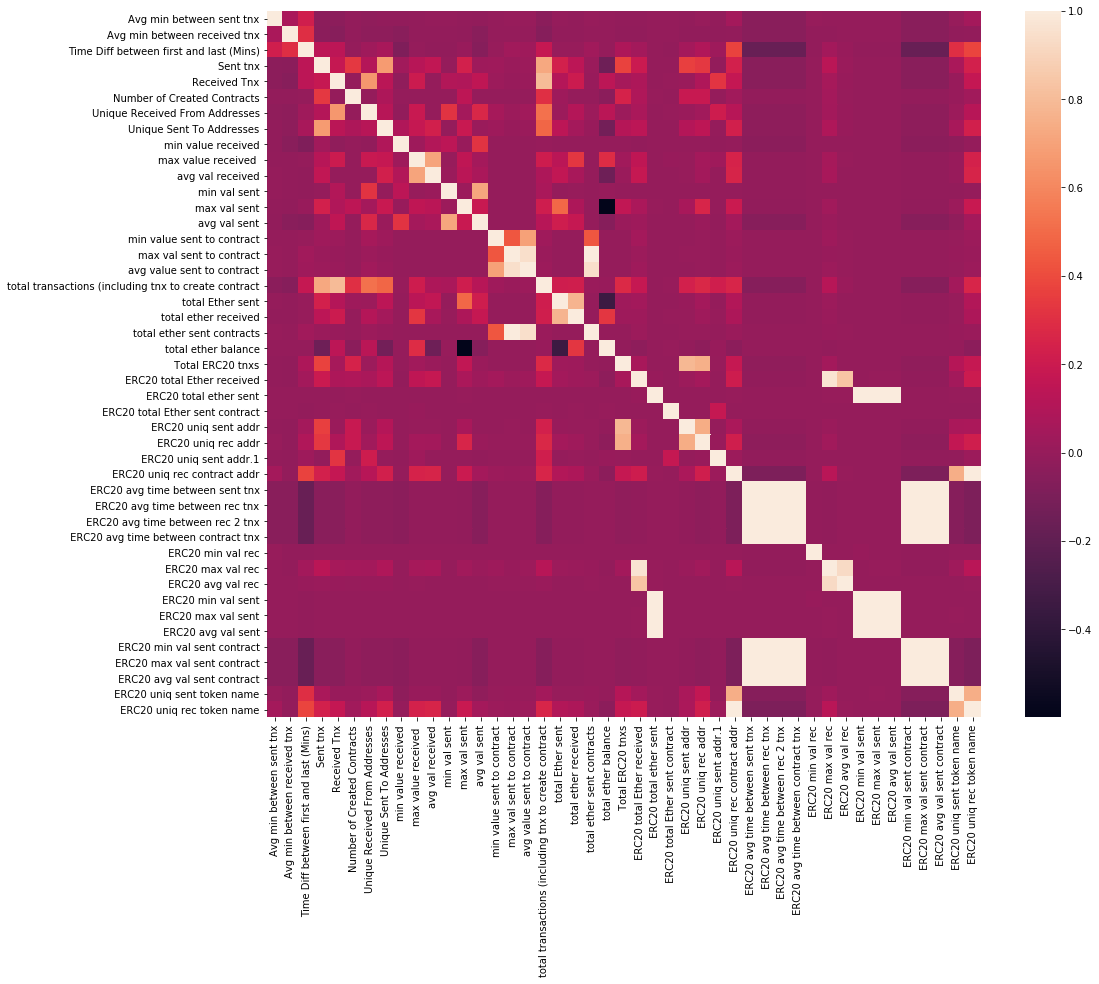

In [88]:
eth_prep.plot_corr(X_eth_train)

In [89]:
X_eth_train_cleaned = eth_prep.remove_multicollinearity_fit_transform(X_eth_train)

/home/pawel/.local/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping total Ether sent with vif=inf
Dropping Sent tnx with vif=inf
Dropping  ERC20 min val sent contract with vif=9007199254740992.0
Dropping  ERC20 avg time between sent tnx with vif=inf
Dropping  ERC20 avg time between rec tnx with vif=inf
Dropping  ERC20 avg time between rec 2 tnx with vif=inf
Dropping  ERC20 avg time between contract tnx with vif=inf
Dropping max val sent to contract with vif=inf
Dropping avg value sent to contract with vif=inf
Dropping  ERC20 max val sent contract with vif=inf
Dropping  ERC20 avg val sent with vif=15646.93245945334
Dropping  ERC20 max val sent with vif=4345.109159788928
Dropping  ERC20 uniq rec contract addr with vif=1790.2761011105974
Dropping  ERC20 total ether sent with vif=1106.288419304409
Dropping  ERC20 max val rec with vif=66.5613514954311
30 numerical features left in dataset  2  categorical


In [90]:
X_eth_test_cleaned=eth_prep.remove_multicollinearity_transform(X_eth_test)

#### One hot encoding
it is simply impossible to use VIF reduction after One Hot Encoding in this particular case

After VIF:

In [91]:
X_eth_train_ohe = eth_prep.one_hot_encoding_fit_transform(X_eth_train_cleaned)

In [92]:
X_eth_test_ohe = eth_prep.one_hot_encoding_transform(X_eth_test_cleaned)

In [93]:
len(X_eth_train_ohe.columns)

687

Without VIF:

In [122]:
X_eth_train_no_vif_ohe = eth_prep.one_hot_encoding_fit_transform(X_eth_train)
X_eth_test_no_vif_ohe = eth_prep.one_hot_encoding_transform(X_eth_test)

In [99]:
len(X_eth_train_no_vif.columns)

702

#### Results when using only numerical features
without VIF reduction

In [94]:
model = LogisticRegression(max_iter=1e20)
model.fit(X_eth_train.drop(columns=[' ERC20 most sent token type',' ERC20_most_rec_token_type']), y_eth_train)
print(X_eth_train.shape[1])
model.score(X_eth_test.drop(columns=[' ERC20 most sent token type',' ERC20_most_rec_token_type']), y_eth_test)

47


0.8041446566436408

#### Results when using only numerical features
with VIF reduction

In [95]:
model = LogisticRegression(max_iter=1e20)
model.fit(X_eth_train_cleaned.drop(columns=[' ERC20 most sent token type',' ERC20_most_rec_token_type']), y_eth_train)
print(X_eth_train_cleaned.shape[1])
model.score(X_eth_test_cleaned.drop(columns=[' ERC20 most sent token type',' ERC20_most_rec_token_type']), y_eth_test)

32


0.7785453067858594

#### Results when using both numerical and categorical features
with VIF but without rescaling 

In [96]:
model = LogisticRegression(max_iter=1e20)
model.fit(X_eth_train_ohe, y_eth_train)
print(X_eth_train_ohe.shape[1])
model.score(X_eth_test_ohe, y_eth_test)

687


0.7785453067858594

#### Results when using both numerical and categorical features
both using VIF feature reduction as well as rescaling

In [97]:
ss=StandardScaler()
X_train_ohe_rescaled = ss.fit_transform(X_eth_train_ohe)
X_test_ohe_rescaled = ss.transform(X_eth_test_ohe)

model = LogisticRegression(max_iter=1e20)
model.fit(X_train_ohe_rescaled, y_eth_train)
print(X_train_ohe_rescaled.shape[1])
model.score(X_test_ohe_rescaled, y_eth_test)

687


0.9886225111743194

In [127]:
y_eth_test.mean()

0.2214546932141406

In [148]:
test_model_approaches(X_eth_train_ohe, X_eth_train_no_vif_ohe, X_eth_test_ohe, X_eth_test_no_vif_ohe,
                      y_eth_train, y_eth_test)


After collinearity cleaning? True. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.76
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.71

After collinearity cleaning? True. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.8
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.8
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.7

After collinearity cleaning? True. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.78
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.97

After collinearity cleaning? True. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? False
Test accuracy: 0.78
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.8

After collinearity cleaning? False. After scaling? True. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.76
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.73

After collinearity cleaning? False. After scaling? False. After target balancing? True
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.78
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.72

After collinearity cleaning? False. After scaling? True. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.77
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.98

After collinearity cleaning? False. After scaling? False. After target balancing? False
GD



Any non-zero predictions on train data? True
Test accuracy: 0.78
SGD



Any non-zero predictions on train data? True
Test accuracy: 0.78
IRLS



Singular matrix
ADAM



Any non-zero predictions on train data? True
Test accuracy: 0.8


In [149]:
for m_name, m in sklearn_models.items():
    m.fit(X_eth_train_ohe.to_numpy(), y_eth_train.to_numpy())
    print(m_name)
    print('Test acc', (measures.accuracy(m.predict(X_eth_test_ohe.to_numpy()), y_eth_test)))
    print('Test F1-score', (measures.f_measure(m.predict(X_eth_test_ohe.to_numpy()), y_eth_test)))

LDA
Test acc 0.9845591223080049
Test F1-score 0.9646840148698885


/home/pawel/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA
Test acc 0.982933766761479
Test F1-score 0.9611829944547136
LR
Test acc 0.7785453067858594


ZeroDivisionError: Recall can not be calculated as there are no positive predictions.